In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn

In [10]:
dataset_file =  pd.read_csv('C:/Users/Pavel/Lessen_jypyter/csv/movies_metadata.csv')
dataset = dataset_file.iloc[0:5000].copy()

C:\Users\Pavel\AppData\Local\Temp\ipykernel_144\33689558.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_file =  pd.read_csv('C:/Users/Pavel/Lessen_jypyter/csv/movies_metadata.csv')


In [11]:
dataset

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,43715,tt0050294,en,The Deadly Mantis,The calving of an Arctic iceberg releases a gi...,...,1957-05-01,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This Was the Day That Engulfed the World in Te...,The Deadly Mantis,False,5.3,16.0
4996,False,NaN,60000000,"[{'id': 18, 'name': 'Drama'}]",NaN,10052,tt0259288,en,Dragonfly,A grieving doctor is being contacted by his la...,...,2002-02-22,52322400.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,When someone you love dies... are they gone fo...,Dragonfly,False,6.2,209.0
4997,False,"{'id': 217704, 'name': 'The Vampire Chronicles...",35000000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,11979,tt0238546,en,Queen of the Damned,Lestat de Lioncourt is awakened from his slumb...,...,2002-02-10,45479110.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This time there are no interviews.,Queen of the Damned,False,5.5,247.0
4998,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,75151,tt0260746,en,Big Bad Love,Vietnam veteran Leon Barlow is struggling as a...,...,2001-10-11,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Big Bad Love,False,6.5,4.0


In [ ]:
# ___________________________________________________________________________info

In [5]:
print(f'           Тип признаков: \n{dataset.dtypes}' )
print(f'           Количество пропусков: \n{dataset.isna().sum()}' )
print(f'           Количество доубликатов: \n{dataset.duplicated().sum()}' )

           Тип признаков: 
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
           Количество пропусков: 
adult                       0
belongs_to_collection    4175
budget                      0
genres                      0
homepage     

In [6]:
#___________________________________________________________________________________________preprocessing

In [12]:
columns = ['adult' ,'vote_count', 'budget', 'homepage', 'imdb_id', 'overview', 'revenue',
           'runtime', 'tagline', 'title', 'video', 'poster_path', 'status', 'belongs_to_collection']
dataset = dataset.drop(columns , axis = 1)

In [13]:
import ast

dataset['genres'] = dataset['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

genres = set(g['name'] for row in dataset['genres'] for g in row)

for genre in genres: 
    dataset[f'genres_{genre}'] = 0

for idx, row in dataset.iterrows(): 
    for g in row['genres']: 
        genre_name = g['name'] 
        dataset.at[idx, f'genres_{genre_name}'] = 1


dataset['id'] = dataset['id'].astype(int)
print(dataset[dataset['id'] == 862]['genres'].iloc[0])

dataset.info()

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genres                  5000 non-null   object 
 1   id                      5000 non-null   int64  
 2   original_language       5000 non-null   object 
 3   original_title          5000 non-null   object 
 4   popularity              5000 non-null   object 
 5   production_companies    5000 non-null   object 
 6   production_countries    5000 non-null   object 
 7   release_date            4996 non-null   object 
 8   spoken_languages        5000 non-null   object 
 9   vote_average            5000 non-null   float64
 10  genres_Animation        5000 non-null   int64  
 11  genres_TV Movie         5000 non-null   int64  
 12  genres_War              5000 non-null   int64  
 

In [14]:
dataset = dataset.drop(columns = ['genres'])

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [16]:
columns = ['original_title','production_companies', 'production_countries', 'spoken_languages']
for column in columns:
    label_encoder = LabelEncoder()
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [17]:
categorical_cols =  ['original_language']


encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

encoded = encoder.fit_transform(dataset[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=dataset.index
)

dataset = pd.concat(
    [dataset.drop(columns=categorical_cols), encoded_df],
    axis=1)

In [18]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])
dataset['release_date'] = (dataset['release_date'].astype('int64') / 1e9) / 86400

In [60]:
dataset

,id,original_title,popularity,production_companies,production_countries,release_date,spoken_languages,vote_average,genres_Animation,genres_TV Movie,...,original_language_ru,original_language_sh,original_language_sk,original_language_sr,original_language_sv,original_language_th,original_language_vi,original_language_wo,original_language_xx,original_language_zh
0,862,4552,21.946943,1921,360,9433.0,293,7.7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8844,1950,17.015539,2427,360,9479.0,201,6.9,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15602,1539,11.7129,2915,360,9486.0,293,6.5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31357,4701,3.859495,2571,360,9486.0,293,6.1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11862,1279,8.387519,2112,360,9171.0,293,5.7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43715,3786,1.738062,2666,360,-4628.0,293,5.3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,10052,1109,4.924078,2770,127,11740.0,148,6.2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,11979,2960,8.436243,2831,27,11728.0,293,5.5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,75151,468,0.437438,0,360,11606.0,293,6.5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler_dataset = scaler.fit_transform(dataset)
X = scaler_dataset

In [51]:
from sklearn.cluster import KMeans

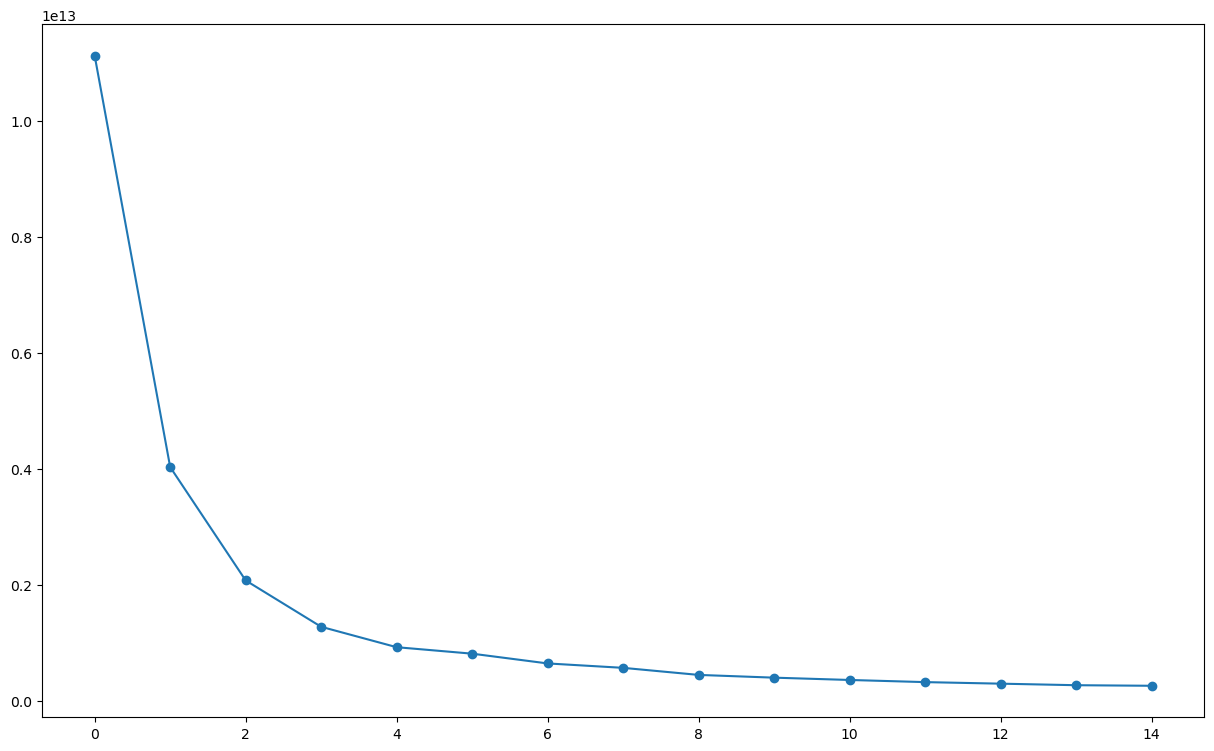

In [89]:
inertia_list = []
for k in range(1,16):
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = "auto", max_iter = 500).fit(dataset)
    inertia = kmeans.inertia_
    inertia_list.append(inertia)


plt.figure(figsize = (15 , 9))
plt.plot(inertia_list, '-o')
plt.show()


#48 кластеров 

In [82]:
number = 40
for i in inertia_list[40:60]:
    number = number + 1
    print(f'количество кластеров: {number}, инерция : {i}')

количество кластеров: 41, инерция : 126461.59016152467
количество кластеров: 42, инерция : 123950.34527434848
количество кластеров: 43, инерция : 118930.79801190106
количество кластеров: 44, инерция : 113884.68767782992
количество кластеров: 45, инерция : 108995.86082900394
количество кластеров: 46, инерция : 103930.09358148112
количество кластеров: 47, инерция : 102233.3631453068
количество кластеров: 48, инерция : 97205.05547142119
количество кластеров: 49, инерция : 93012.85442798519
количество кластеров: 50, инерция : 88005.20627089823
количество кластеров: 51, инерция : 87373.59387795444
количество кластеров: 52, инерция : 83073.37258736926
количество кластеров: 53, инерция : 80530.00146896388
количество кластеров: 54, инерция : 79405.71158905045
количество кластеров: 55, инерция : 70189.72233908926
количество кластеров: 56, инерция : 68457.56818398877
количество кластеров: 57, инерция : 67842.8939993057
количество кластеров: 58, инерция : 67067.01201111314
количество кластеров: 5

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [98]:
dbscan_score.clear()

In [95]:
dbscan_score = []
for e in range(1, 9):
    silhouette = []
    for ms in range(1, 9):
        dbscan = DBSCAN(eps = e, min_samples= ms)
        score = silhouette_score(X, dbscan.fit_predict(X))
        silhouette.append(score)
    dbscan_score.append(silhouette)
    

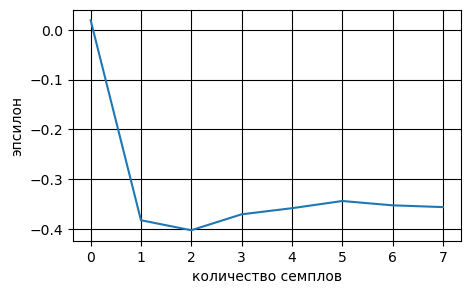

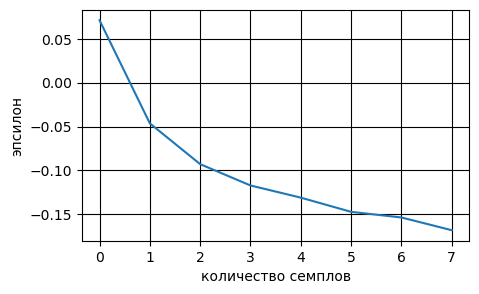

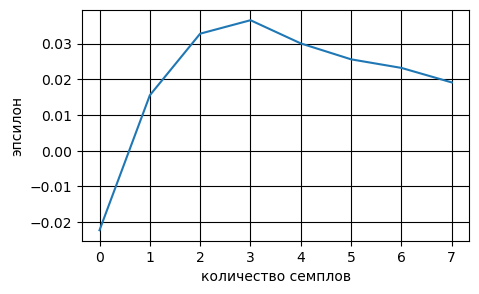

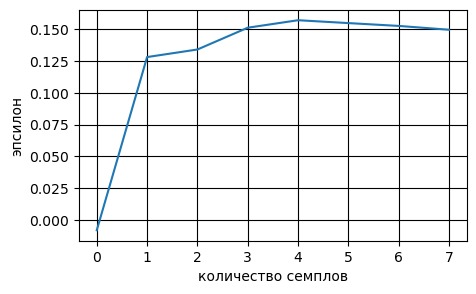

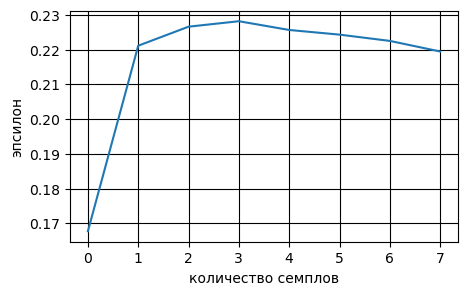

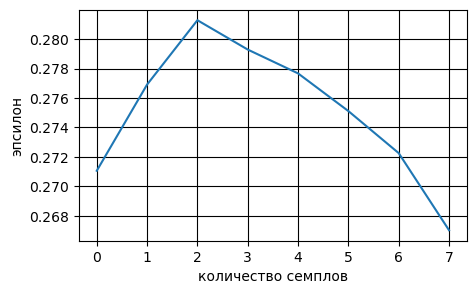

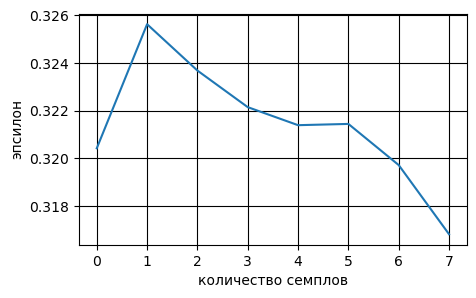

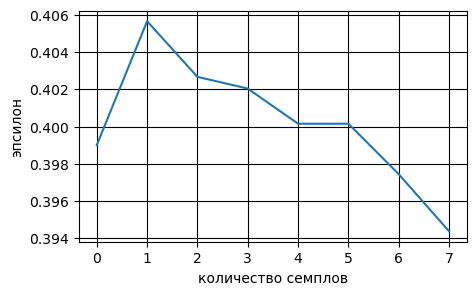

In [73]:
for hist in range(8):
    plt.figure(figsize = (5, 3))
    plt.xlabel('количество семплов')
    plt.ylabel('эпсилон')
    plt.plot(dbscan_score[hist], '-')
    plt.grid(True, color = 'k')